In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
base_treino = pd.read_csv(r"D:\pipeline_dados\base_orcamentos_treino.csv")

In [10]:
base_treino

,id_quote,dt_criacao,dias_desejo,dias_em_casa,ds_tipo_obra,nm_prop_oportunidade,proprietario,promocional,convertido,tipo_loja,...,amb_outros,revestimento,officina,loucas_metais,arg_rejunte,categ_outros,vl_frete,vlr_orcamento,convertidos,nao_convertidos
0,0Q03s000000GRoxCAG,2022-06-09,203,534,Nova Obra,leticia silva de arruda,zzzzzzzXzzzzzXzzXzzzzzz,S,N,Tradicional A,...,S,7,2,0,8,0,153.33,76444.94,412,330
1,0Q03s000000GRsGCAW,2022-06-09,11,534,Nova Obra,leticia silva de arruda,zzzzzzzXzzzzzXzzXzzzzzz,S,S,Tradicional A,...,N,1,0,0,0,0,26.67,64.80,412,330
2,0Q03s000000GRwXCAW,2022-06-09,15,534,Nova Obra,fabiano martins werutsky,zzzzzzzXzzzzzzzXzzzzzzzz,S,N,Tradicional A,...,S,1,0,0,0,0,266.67,14763.62,343,438
3,0Q03s000000GS0UCAW,2022-06-09,30,534,Nova Obra,leticia silva de arruda,zzzzzzzXzzzzzXzzXzzzzzz,S,S,Tradicional A,...,S,1,0,0,4,0,66.67,1301.09,412,330
4,0Q03s000000GS1cCAG,2022-06-09,29,534,Reforma,rafaela de sousa paonessa loureiro,zzzzzzzXzzXzzzzzXzzzzzzzzXzzzzzzzz,S,N,Tradicional A,...,S,0,0,10,0,0,83.33,3276.30,342,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,0Q03s000001mURcCAM,2023-10-17,24,39,Nova Obra,fabiano martins werutsky,zzzzzzzXzzzzzzzXzzzzzzzz,S,N,Tradicional A,...,S,1,0,0,4,0,93.33,1905.18,343,438
5593,0Q03s000001mUX1CAM,2023-10-17,1,39,Reforma,patricia agnes,zzzzzzzzXzzzzz,S,S,Tradicional A,...,S,1,0,0,0,0,60.00,131.27,348,503
5594,0Q03s000001mUdiCAE,2023-10-17,52,39,Nova Obra,juliana westphalen gonçalves,zzzzzzzXzzzzzzzzzzXzzzzzzzzz,S,N,Tradicional A,...,S,8,0,0,10,0,493.33,35609.59,488,538
5595,0Q03s000001mUh6CAE,2023-10-17,196,39,Reforma,matheus homrich,zzzzzzzXzzzzzzz,S,S,Tradicional A,...,S,7,4,0,18,0,576.45,27856.07,184,197


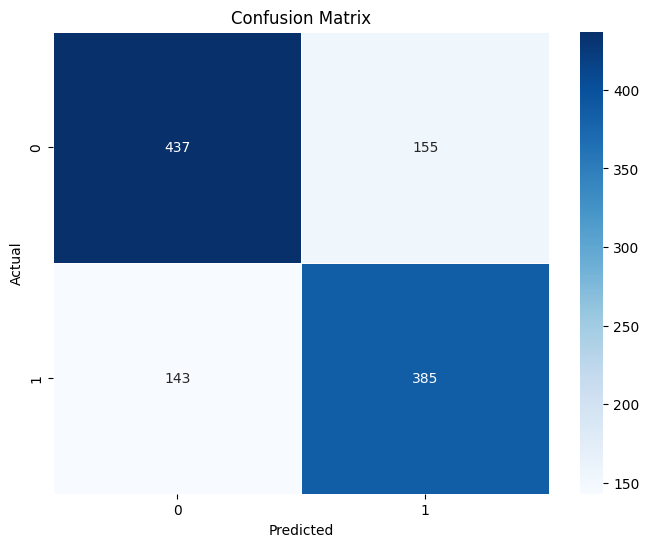


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       592
           1       0.71      0.73      0.72       528

    accuracy                           0.73      1120
   macro avg       0.73      0.73      0.73      1120
weighted avg       0.73      0.73      0.73      1120

Acurácia no conjunto de teste: 73.39%


,nm_prop_oportunidade,convertido,probabilidade_conversao,id_quote
0,adryson pinto freitas,1,0.492991,0Q03s000000SgjJCAS
1,ana paula goncalves lemos,1,0.514414,0Q03s000000GbRDCA0
2,bruno schmelzer de souza,0,0.506417,0Q03s000000GSpmCAG
3,claudia marina silva,0,0.476449,0Q03s000000GUhUCAW
4,dara jenifer de jesus,1,0.533814,0Q03s000000SYHxCAO
5,ediane rosa,0,0.477213,0Q03s000000SgIICA0
6,fabiano martins werutsky,1,0.547194,0Q03s000000GRwXCAW
7,juliana westphalen gonçalves,0,0.498368,0Q03s000000GS97CAG
8,leticia silva de arruda,1,0.504678,0Q03s000000GRoxCAG
9,luis roberto da silva ferreira junior,1,0.535376,0Q03s000000GSIiCAO


In [11]:


categoricos = ['id_quote', 'dt_criacao', 'ds_tipo_obra', 'nm_prop_oportunidade', 'proprietario', 'promocional',
               'tipo_loja', 'banheiro', 'toda_casa', 'cozinha', 'area_externa', 'itens_assentamento', 'sala',
               'piscina', 'area_servico', 'garagem', 'dormitorio', 'varanda', 'escada', 'amb_outros']

encoder = OneHotEncoder(drop='if_binary')
df_encoded = pd.DataFrame(encoder.fit_transform(base_treino[categoricos]).toarray(),
                          columns=encoder.get_feature_names_out(categoricos))
df_final = pd.concat([base_treino.drop(categoricos, axis=1), df_encoded], axis=1)

X = df_final.drop('convertido', axis=1)
y = df_final['convertido']

var_threshold = 0.40
selector = VarianceThreshold(threshold=(var_threshold * (1 - var_threshold)))
X_high_variance = selector.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

x_treino, x_teste, y_treino, y_teste = train_test_split(X_high_variance, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

smote = SMOTE(random_state=42)
x_treino_resampled, y_treino_resampled = smote.fit_resample(x_treino, y_treino)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 3, 5],
    'scoring': ['accuracy']
}

hist_grad_boost = HistGradientBoostingClassifier()

grid_search = GridSearchCV(hist_grad_boost, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_treino_resampled, y_treino_resampled)

best_params = grid_search.best_params_

modelo_hist_grad_boost = HistGradientBoostingClassifier(**best_params)
modelo_hist_grad_boost.fit(x_treino_resampled, y_treino_resampled)

y_pred = modelo_hist_grad_boost.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_teste, y_pred))

acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia no conjunto de teste: {acuracia * 100:.2f}%')

probabilidades_teste = modelo_hist_grad_boost.predict_proba(x_teste)[:, 1]

x_teste_df = pd.DataFrame(x_teste, columns=X.columns[selector.get_support()])
df_temporario_teste = pd.DataFrame({
    'nm_prop_oportunidade': base_treino.loc[x_teste_df.index, 'nm_prop_oportunidade'],
    'convertido': y_teste,
    'id_quote':base_treino.loc[x_teste_df.index, 'id_quote'],
    'probabilidade_conversao': probabilidades_teste
})

df_temporario_teste = df_temporario_teste.drop_duplicates(subset=['nm_prop_oportunidade', 'convertido','id_quote'])

df_resultados_teste = df_temporario_teste.groupby('nm_prop_oportunidade', as_index=False).agg({
    'convertido': 'first',
    'probabilidade_conversao': 'mean',
    'id_quote': 'first'  
})

with pd.option_context('display.max_rows', None):
    display(df_resultados_teste[['nm_prop_oportunidade', 'convertido', 'probabilidade_conversao', 'id_quote']])


In [12]:
df_resultados_teste.to_csv("probabilidade_histgradiente_Classifier.csv")